# Part 1 Computational Costs
In this part of the lab you will be aiming to estimate the computational cost of stepping functions 
for:
- Gradient Descent: $$x_{i+1} = x_i - \alpha \nabla f(x_i)$$
- Newtons Method: $$x_{i+1} = x_i - H_f^{-1} \nabla f(x_i)$$  
In applications, we want to know how our algorithms scale, 
but may not be able to analytically know how expensive each step is, 
or we want to check that our analysis 
matches with experimental results. 

For this problem we will be effectively generating least squares problem (code provided), then taking one optimization step with each method. 

## A. First compute the computational cost Analytically
Similar to the homework compute the computational cost on paper, then we will compare this to our numerical results.

## B. Run an experiment to see if our analysis matches the data 
For this problem, we give to inputs $N,M$ which are integers to two functions `foo1, foo2`. We want to estimate 
how each function's cost scales as a function of those inputs (think $O(N^kM^l)$). Good functions to use would be 
`time` to get wall times around function calls while calling the functions at various inputs. Then you can plot the results and possible pose least square problems to estimate the rates 

- **hint**: log-scale may be important
- **hint**: perhaps fix one input to estimate the rate with the other


In [1]:
import numpy as np 
from time import time

In [25]:
from numpy.random import random, randn
from numpy import sqrt
import matplotlib.pyplot as plt
def buildLeastSquares(N, M, noise_level=1, debug=False):
  start = time()
  A = random((M,N))
  if debug: print(f'rand {time() - start}')
  start = time()
  np.fill_diagonal(A,10)
  if debug: print(f'diag reg {time() - start}')
  start = time()
  x = rand(N)
  b = A@x + noise_level*randn(M)
  if debug: print(f'b {time() - start}')
  return A, b
def gradDescentStep(x, A, b, step_sz=1):
  return x - step_sz * A.T@(A@x -b)
def newtonStep(x, A, b):
  return x - np.linalg.solve(A.T@A, A.T@(A@x - b))

In [34]:
import sys
from math import pow
debug = True
base = 10
stop = 6
Ns = (10**np.arange(start=2.0,stop=4,step=0.25)).astype(int)
Ms = (10**np.arange(start=2.0,stop=5,step=0.25)).astype(int)
numN, numM = len(Ns), len(Ms)
gradTimes = np.zeros((numN,numM))
newtonTimes = np.zeros((numN,numM))
for n, N in enumerate(Ns):
    for m, M in enumerate(Ms):
        if M < N: 
            continue
        if debug: sys.stdout.write(f'{N=}, {M=}\n')
        start=time()
        A, b = buildLeastSquares(N,M)
        print(f'\tBuild sys time {time()-start}')
        x0 = np.zeros(N)
        start = time()
        gradDescentStep(x0, A, b)
        gradTimes[n,m] = time()-start
        print(f'\tgrad time {gradTimes[n,m]}')
        start = time()
        newtonStep(x0, A, b)
        newtonTimes[n,m] = time()-start
        print(f'\tnewton time {newtonTimes[n,m]}')

N=100, M=100
	Build sys time 0.004243135452270508
	grad time 0.008687019348144531
	newton time 0.024194002151489258
N=100, M=177
	Build sys time 0.001828908920288086
	grad time 0.008183002471923828
	newton time 0.03891587257385254
N=100, M=316
	Build sys time 0.00047206878662109375
	grad time 7.224082946777344e-05
	newton time 0.0008220672607421875
N=100, M=562
	Build sys time 0.0017368793487548828
	grad time 0.017966747283935547
	newton time 0.005939960479736328
N=100, M=1000
	Build sys time 0.0003840923309326172
	grad time 0.0001480579376220703
	newton time 0.0003063678741455078
N=100, M=1778
	Build sys time 0.0005171298980712891
	grad time 0.00015306472778320312
	newton time 0.0003941059112548828
N=100, M=3162
	Build sys time 0.0010502338409423828
	grad time 0.00026607513427734375
	newton time 0.0018429756164550781
N=100, M=5623
	Build sys time 0.0016720294952392578
	grad time 0.0005350112915039062
	newton time 0.0011508464813232422
N=100, M=10000
	Build sys time 0.00521302223205566

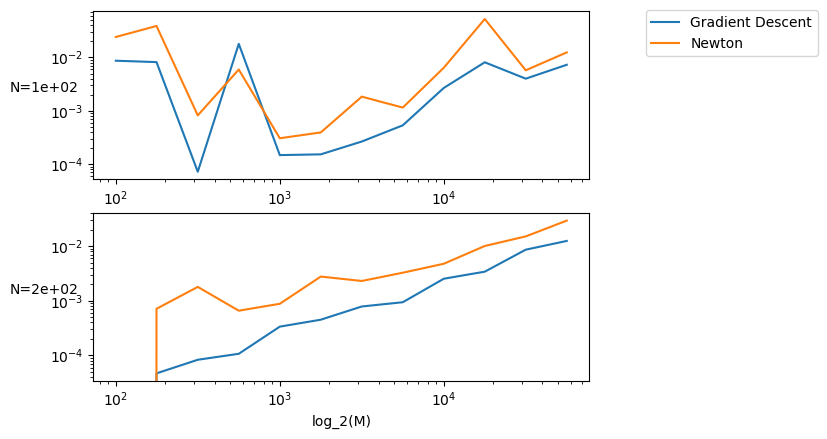

GradDesc is O(N^0.9719428598994706)
Newton is O(N^0.6122290440483181)


/var/folders/nd/t97qzzn5709_g3t64qkh7rj80000gp/T/ipykernel_46983/3974674043.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]
/var/folders/nd/t97qzzn5709_g3t64qkh7rj80000gp/T/ipykernel_46983/3974674043.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]


In [43]:
## Show both are linear in M
fig, ax = plt.subplots(2)
for n, N in enumerate(Ns[:2]):
   ax[n].set_xscale('log', base=base)
   ax[n].set_yscale('log', base=base)
   ax[n].plot(Ms, gradTimes[n,:], label=f'GradDescent {N=}')
   ax[n].plot(Ms, newtonTimes[n,:], label=f'Newton {N=}')
   ax[n].set_ylabel(f'N={N:.0e}',rotation='horizontal')
plt.xlabel(f'log_2(M)')
ax[0].legend(['Gradient Descent', 'Newton'], bbox_to_anchor=(1.1, 1.05))
plt.show()

A = np.stack((np.log10(Ms[1:]), np.ones_like(Ms[1:]))).T
b = np.log10(gradTimes[1,1:])
x = np.linalg.lstsq(A, b)[0]
print(f'GradDesc is O(N^{x[0]})')
A = np.stack((np.log10(Ms[1:]), np.ones_like(Ms[1:]))).T
b = np.log10(newtonTimes[1,1:])
x = np.linalg.lstsq(A, b)[0]
print(f'Newton is O(N^{x[0]})')

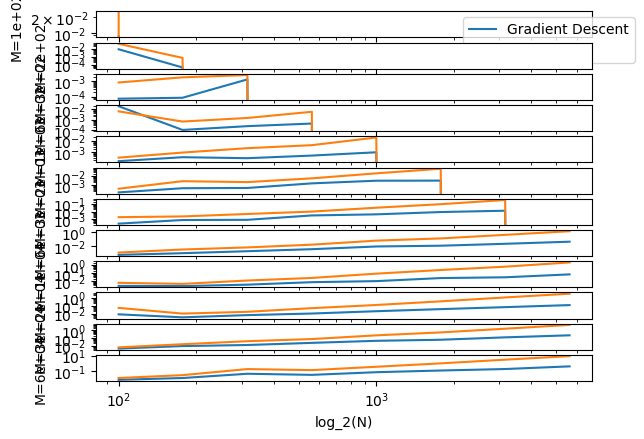

GradDesc is O(M^0.93285115687163
Newton is O(M^1.546522772902962


/var/folders/nd/t97qzzn5709_g3t64qkh7rj80000gp/T/ipykernel_46983/1231581400.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]
/var/folders/nd/t97qzzn5709_g3t64qkh7rj80000gp/T/ipykernel_46983/1231581400.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]


In [41]:
## Show both are linear in M
fig, ax = plt.subplots(len(Ms))
for m, M in enumerate(Ms):
   ax[m].set_xscale('log', base=base)
   ax[m].set_yscale('log', base=base)
   ax[m].plot(Ns, gradTimes[:,m], label=f'GradDescent {N=}')
   ax[m].plot(Ns, newtonTimes[:,m], label=f'Newton {N=}')
   ax[m].set_ylabel(f'M={M:.0e}')
plt.xlabel(f'log_2(N)')
ax[0].legend(['Gradient Descent', 'Newton'], bbox_to_anchor=(1.1, 1.05))
plt.show()

A = np.stack((np.log10(Ns), np.ones_like(Ns))).T
b = np.log10(gradTimes[:,-1])
x = np.linalg.lstsq(A, b)[0]
print(f'GradDesc is O(M^{x[0]}')
A = np.stack((np.log10(Ns), np.ones_like(Ns))).T
b = np.log10(newtonTimes[:,-1])
x = np.linalg.lstsq(A, b)[0]
print(f'Newton is O(M^{x[0]}')

In [18]:
A.shape

(2, 12)